<a href="https://colab.research.google.com/github/rmcelfresh/IST718Lab9/blob/master/McElfresh_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q xlrd
# import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
!python3.6 -m pip install scipy==1.2 --upgrade
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

#from pyvttbl import DataFrame # Anova
from scipy import stats
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn import linear_model
from shapely.geometry import Point, Polygon
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

     |████████████████████████████████| 26.6MB 1.9MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


In [0]:
!pip install mnist
!pip install python-mnist

Installing the needed files
Importing the py file needed to read the fashion mnist docs

In [0]:
import "content/fashion-mnist/utils/mnist_reader.py"

SyntaxError: ignored

In [0]:
#cloning the git hub dist for fashion mnist
!git clone https://github.com/zalandoresearch/fashion-mnist.git


Cloning into 'fashion-mnist'...
remote: Enumerating objects: 681, done.
remote: Total 681 (delta 0), reused 0 (delta 0), pack-reused 681
Receiving objects: 100% (681/681), 105.20 MiB | 62.77 MiB/s, done.
Resolving deltas: 100% (393/393), done.


In [0]:
#couldn't figure out how to access this from the nested file so I downloaded and reuploaded the file to the main directory
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')


In [0]:
#making sure the sizes make sense
#x=the pixel detail, y = label
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [0]:
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))


Rows: 60000, columns: 784


In [0]:
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))


Rows: 10000, columns: 784


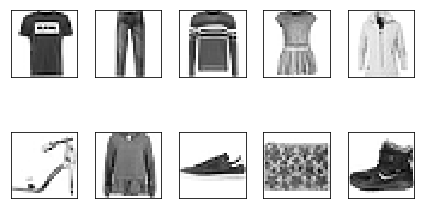

In [0]:
#looking at one of each type of clothing-- off the bat I think the different types of shirts/tops and different types of shoes will be tough to distingush between

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()


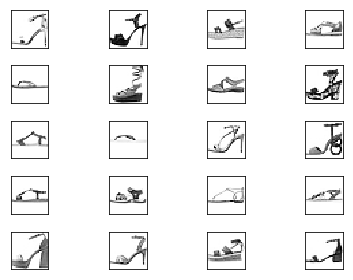

In [0]:
# VISUALIZE DIFFERENT VARIATIONS OF Sandals

fig, ax = plt.subplots(nrows=5, ncols=4, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(20):
    img = X_train[y_train == 5][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_9.png', dpi=300)
plt.show()


In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt


In [0]:
#random forest code adopted from https://www.kaggle.com/atorin/mnist-digit-recognition-with-random-forests
from sklearn.ensemble import RandomForestClassifier


In [0]:
#building my initial classifier
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10)


In [0]:
#fitting the classifier to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
#scoring the classifier on the test data--not bad for no tuning
rfc.score(X_test, y_test)
#0.8556

0.8556

next I tried several different classifier set ups to see what worked best considering processing time

In [0]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=20)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)
#0.8671

0.8671

In [0]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=50)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)
#0.8731 best mix of time to run and predictive power

0.8731

In [0]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=100)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)
#0.8752 --marginal improvement for significantly longer processing time

0.8752

In [0]:
#trying to manipulate other variables
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=50, criterion = "entropy")
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)
#0.8768 best mix of time to run and predictive power

0.8775

In [0]:
#building my confusion matrix
predictions = rfc.predict(X_test)
predictions[4]
np.argmax(predictions[0])
test_labels[0]


print(predictions)

[9 2 1 ... 8 1 5]


In [0]:
#didn't end up using this here--used below
Image=[]
Pred=[]
TrueLabel=[]
Images=np.array([np.arange(10000)]*1).T
for i in Images:
    Image.append(i)
    predictions[i]
    TrueLabel.append(y_test[i])

In [0]:
print(len(y_test),
len(predictions),
len(TrueLabel))

10000 10000 10000


In [0]:
#building dataframe for confusion matrix
d = {'Image':Image, "Prediction": predictions, "TrueLabel": y_test}
df= pd.DataFrame(d)
df.head()

,Image,Prediction,TrueLabel
0,[0],9,9
1,[1],2,2
2,[2],1,1
3,[3],1,1
4,[4],6,6


In [0]:
df.to_csv('RandomForestfinalPred.csv')

In [0]:
#tensor flow code adopted from https://www.tensorflow.org/tutorials/keras/basic_classification

In [0]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.13.1


In [0]:
#pulling in the same data as before but from a different source--not really necessary

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#storing the class names to use later
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
#again confirming my table sizes=looks right (28x28 is pixel size of each image)
print(train_images.shape)
print(len(train_labels))


(60000, 28, 28)
60000


In [0]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


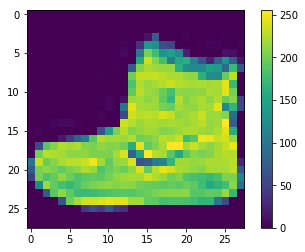

In [0]:
#demonstrating what the pics look like in terms of pixel darkness--these will be changed to B&W for actual processing
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

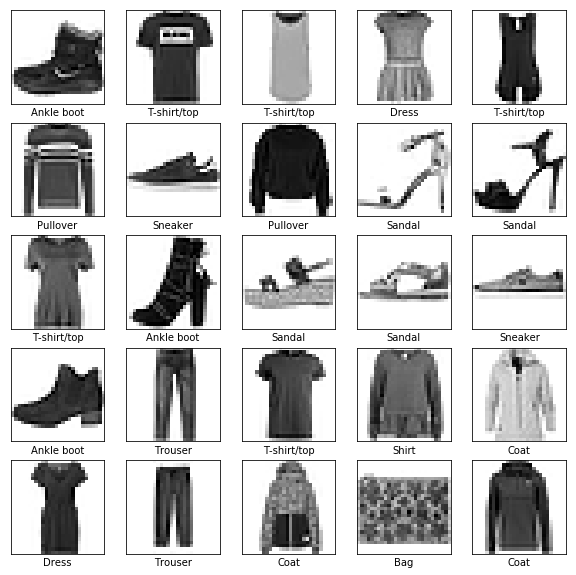

In [0]:
#looking at an assortment of different varities of clothing included in the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
#building my model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
#compliling the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
#initial run w/ ten epochs
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.2825 - acc: 0.8960
Epoch 2/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2730 - acc: 0.8989
Epoch 3/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2600 - acc: 0.9033
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2507 - acc: 0.9070
Epoch 5/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2415 - acc: 0.9082
Epoch 6/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2346 - acc: 0.9120
Epoch 7/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2268 - acc: 0.9138
Epoch 8/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2183 - acc: 0.9169
Epoch 9/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2118 - acc: 0.9203
Epoch 10/10
60000/60000 [==============================] - 7s 110us/sampl

In [0]:
#second run with 300 epochs
history  = model.fit(train_images, train_labels, validation_data=(test_images,test_labels), epochs=300, batch_size=1000, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/300
 - 2s - loss: 0.1768 - acc: 0.9338 - val_loss: 0.3173 - val_acc: 0.8953
Epoch 2/300
 - 1s - loss: 0.1634 - acc: 0.9395 - val_loss: 0.3179 - val_acc: 0.8946
Epoch 3/300
 - 1s - loss: 0.1616 - acc: 0.9402 - val_loss: 0.3186 - val_acc: 0.8940
Epoch 4/300
 - 1s - loss: 0.1600 - acc: 0.9409 - val_loss: 0.3184 - val_acc: 0.8944
Epoch 5/300
 - 1s - loss: 0.1590 - acc: 0.9408 - val_loss: 0.3195 - val_acc: 0.8936
Epoch 6/300
 - 1s - loss: 0.1578 - acc: 0.9411 - val_loss: 0.3190 - val_acc: 0.8941
Epoch 7/300
 - 1s - loss: 0.1571 - acc: 0.9423 - val_loss: 0.3197 - val_acc: 0.8947
Epoch 8/300
 - 1s - loss: 0.1561 - acc: 0.9426 - val_loss: 0.3192 - val_acc: 0.8945
Epoch 9/300
 - 1s - loss: 0.1555 - acc: 0.9426 - val_loss: 0.3185 - val_acc: 0.8932
Epoch 10/300
 - 1s - loss: 0.1548 - acc: 0.9426 - val_loss: 0.3198 - val_acc: 0.8951
Epoch 11/300
 - 1s - loss: 0.1541 - acc: 0.9434 - val_loss: 0.3206 - val_acc: 0.8935
Epoch 12/300
 - 1s - los

In [0]:
#evaluating test accuracy of final epcoh. Obviously the model was overfitting the test dat (99% accuracy there to 88% here)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
#Test accuracy: 0.8872 --suggests overfitting of training model :/

10000/10000 [==============================] - 0s 43us/sample - loss: 0.7664 - acc: 0.8860
Test accuracy: 0.886


In [0]:
#generating my predictions
predictions = model.predict(test_images)


In [0]:
#looking at a prediction for the first image-- it is going through and ranking the likilhood that it is 0-9, whichever is highest is choosen as the actual prediction
predictions[0]

array([1.51867493e-32, 1.20777077e-26, 8.15045464e-27, 2.65616098e-25,
       0.00000000e+00, 1.02070506e-13, 6.87785230e-23, 1.00485904e-10,
       7.69370769e-20, 1.00000000e+00], dtype=float32)

In [0]:
np.argmax(predictions[0])


9

In [0]:
#comparing our prediction to the actual value
test_labels[0]


9

In [0]:
#creating a graph to show the predictions for  images

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

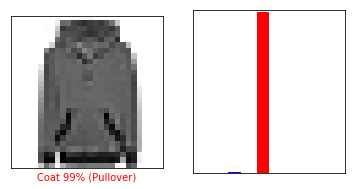

In [0]:
#sometimes even if we're sure it's one--it isn't....
i = 9441
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

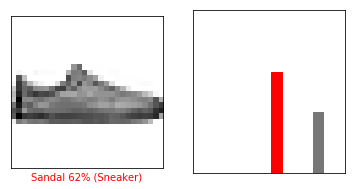

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


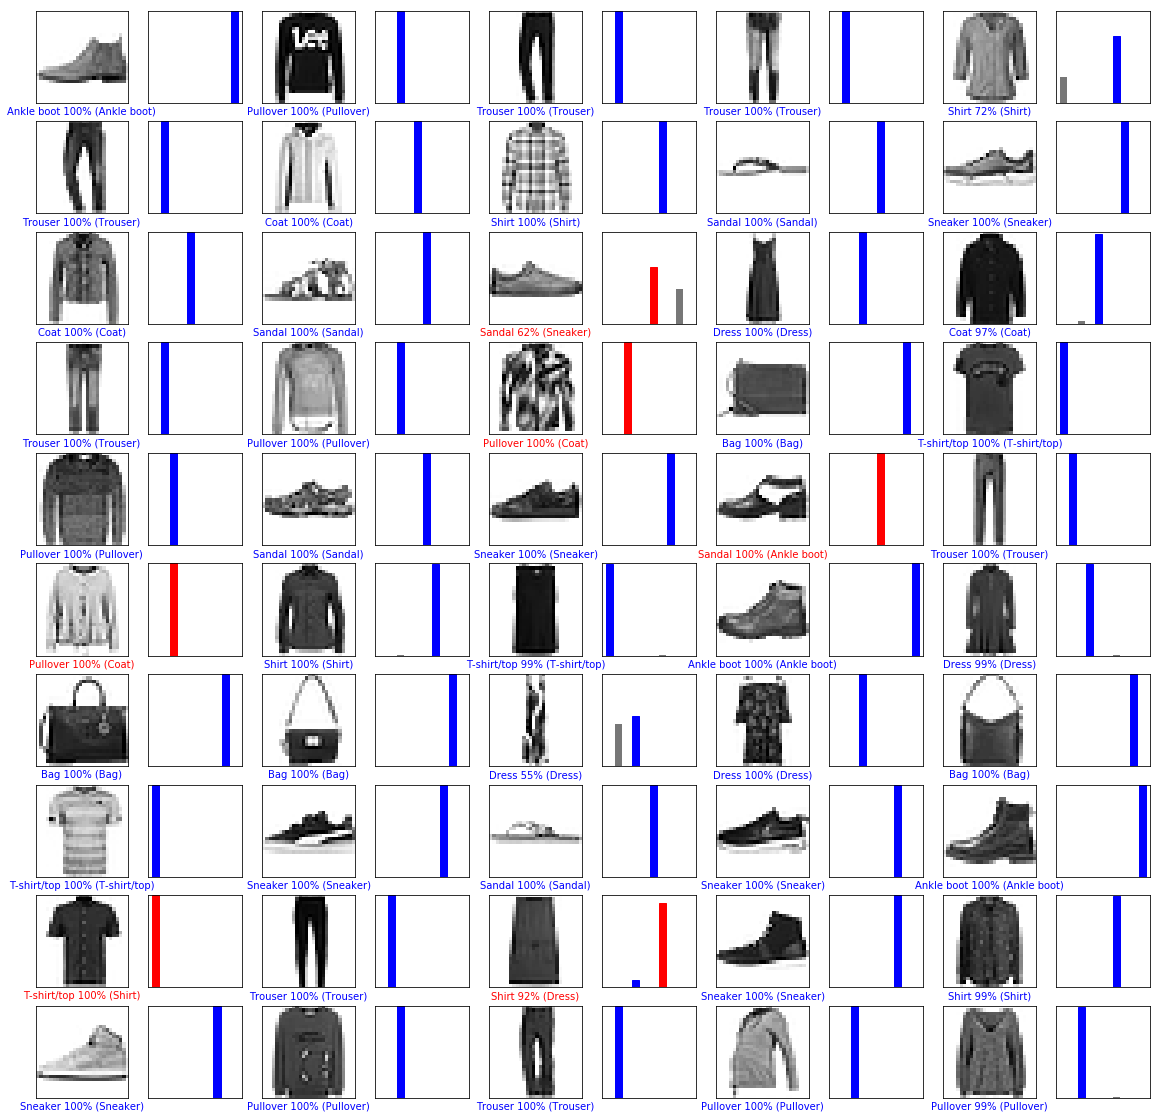

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red, gray= unsure
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [0]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [0]:
predictions_single = model.predict(img)

print(predictions_single)


[[1.51865186e-32 1.20777077e-26 8.15039224e-27 2.65619130e-25
  0.00000000e+00 1.02069733e-13 6.87787881e-23 1.00485523e-10
  7.69373612e-20 1.00000000e+00]]


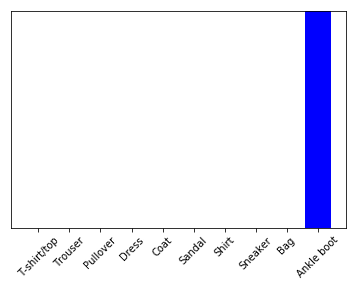

In [0]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [0]:
predictions = model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]



(1000, 28, 28)


In [0]:
#creating a loop to make a confusion matrix-- only selecting the "best guess" for the prediction value
Image=[]
Pred=[]
TrueLabel=[]
Images=np.array([np.arange(10000)]*1).T
for i in Images:
    Image.append(i)
    predictions[i]
    Pred.append(np.argmax(predictions[i]))
    TrueLabel.append(test_labels[i])

Exception: ignored

In [0]:
len(Pred)
len(Images)
len(TrueLabel)

10000

In [0]:
d = {'Image':Image, "Prediction":Pred, "TrueLabel":TrueLabel}

In [0]:
df=pd.DataFrame(d)

In [0]:
df.head()

,Image,Prediction,TrueLabel
0,[0],9,[9]
1,[1],2,[2]
2,[2],1,[1]
3,[3],1,[1]
4,[4],6,[6]


In [0]:
#exporting dataframe to excel to make confusion matrix!
df.to_csv('finalPred.csv')